# Topic: Recommendation for Amazon/Taobao/Shopee sellers


### Data Acquisition
The comments used in this project are obtained from Datafiniti dataset. 

This is a list of over 34,000 consumer reviews for Amazon products like the Kindle, Fire TV Stick, and more. The dataset includes basic product information, rating, review text, and more for each product.

Schema: https://developer.datafiniti.co/docs/product-data-schema


In [1]:
import pandas as pd
import glob

def load_csv_to_dict(columns_to_drop):
    # Load the CSV file into a pandas DataFrame
    csv_files = glob.glob('*.{}'.format('csv'))
    data_frame = pd.concat([pd.read_csv(file, low_memory=False) for file in csv_files ], ignore_index=True)
    
#     data_frame = pd.read_csv(file_path, low_memory=False)
    
    # Drop the columns that are not needed
    data_frame = data_frame.drop(columns=columns_to_drop)
    
    # Convert the DataFrame to a dictionary
    data_dict = data_frame.to_dict('list')
    
    # Return the dictionary
    return data_dict

columns_to_drop = ['id', 'brand', 'categories', 'keys', 'manufacturer', 'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful', 'reviews.sourceURLs', 'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'dateAdded', 'dateUpdated', 'primaryCategories', 'imageURLs', 'manufacturerNumber', 'sourceURLs']
print("Loading Dataset ...")
dataset = load_csv_to_dict(columns_to_drop)
print("The dataset is ready.")

Loading Dataset ...
The dataset is ready.


In [2]:
print('The architecture of the dataset is ', dataset.keys())

The architecture of the dataset is  dict_keys(['name', 'asins', 'reviews.rating', 'reviews.text', 'reviews.title'])


In [3]:
from collections import Counter
res = Counter(dataset['asins'])
print(res)
# print("{:<10}   {:<10}".format('asin', 'number'))
# # print each data item.
# for key, value in res.items():
#     print("{:<10}   {:<10}".format(key, value))

Counter({'B018Y229OU': 10966, 'B00QWO9P0O,B00LH3DMUO': 8343, 'B00L9EPT8O,B01E6AO69U': 6619, 'B00U3FPN4U': 5056, 'B00QWO9P0O,B01IB83NZG,B00MNV8E0C': 3728, 'B01AHB9CN2': 3611, 'B00OQVZDJM': 3176, 'B018Y23MNM': 3114, 'B018Y225IA': 2492, 'B018T075DC': 2450, 'B018SZT3BK,B01AHB9CN2': 2370, 'B018Y22C2Y': 1992, 'B018Y226XO': 1676, 'B01BH83OOM': 1462, 'B018Y22BI4': 1405, 'B00IOY8XWQ': 1167, 'B01J94YIT6': 883, 'B018Y224PY': 846, 'B010CEHQTG': 650, 'B06XB29FPF': 590, 'B017JG41PC': 446, 'B01J2G4VBG': 402, 'B00TSUGXKE': 372, 'B0189XYY0Q': 362, 'B00ZV9PXP2': 325, 'B01AHB9CYG': 313, 'B01J94SCAM': 293, 'B018SZT3BK': 270, 'B01J94SBEY': 233, 'B01AHBDCKQ': 226, 'B01AHB9C1E': 223, 'B01ACEKAJY': 198, 'B01J24C0TI': 196, 'B01J94T1Z2': 160, 'B00VINDBJK': 145, 'B00QFQRELG': 134, 'B01J94SWWU': 130, 'B01AHBBG04': 118, 'B00IOYAM4I': 109, 'B00REQKWGA': 100, 'B0189XZRTI,B0189XYY0Q,B0189XZ0KY': 99, 'B01IO618J8': 82, 'B00ZS0G0PG': 62, 'B01BFIBRIE': 30, 'B00EEBS9O0,B01CHQHIJK': 25, 'B06XD5YCKX': 22, 'B00DUGZFWY': 21, 

In [4]:
# import nltk
# nltk.download('stopwords')

### Data processing

Clean the data to make it structured, less noisy

In [5]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

def preprocess(text):
    new_text = []
    for t in text.split(" "):
        
        # Converting the text to lowercase
        t = t.lower()
        
        # Removing punctuations
        t = "".join([char for char in t if char not in string.punctuation])
        
        # Removing stop words
        stop_words = stopwords.words('english')
        if t not in stop_words:
            t = t
        else:
            continue
            
        # Stemming
        porter = PorterStemmer()
        t = porter.stem(t)
        
        new_text.append(t)
    return " ".join(new_text)

### Model deployment

Use a pre-trained semantic model to evaluate the users’ emotions

1 Name: LiYuan/amazon-review-sentiment-analysis

Repository: https://github.com/vanderbilt-data-science/bigdata/blob/main/06-fine-tune-BERT-on-our-dataset.ipynb

This model is a fine-tuned version of nlptown/bert-base-multilingual-uncased-sentiment on an [Amazon US Customer Reviews Dataset](https://www.kaggle.com/datasets/cynthiarempel/amazon-us-customer-reviews-dataset). The code for the fine-tuning process can be found here. 

2 Name: cardiffnlp/twitter-roberta-base-{task} # task = emoji, emotion, hate, irony, offensive, sentiment

Repository: https://github.com/cardiffnlp/tweeteval

This is a roBERTa-base model trained on ~58M tweets and finetuned for sentiment analysis with the TweetEval benchmark. This model is suitable for English (for a similar multilingual model, see XLM-T).
Labels: 0 -> Negative; 1 -> Neutral; 2 -> Positive


3 Name: finiteautomata/bertweet-base-sentiment-analysis

Repository: https://github.com/finiteautomata/pysentimiento/

Model trained with SemEval 2017 corpus (around ~40k tweets). Base model is BERTweet, a RoBERTa model trained on English tweets.
Uses POS, NEG, NEU labels.

4 Name: clhuang/albert-sentiment

Repository: https://github.com/ckiplab/ckip-transformers

According to the fine-tuning of the ckiplab/albert pre-training model, the training data set has only 80,000 records.
Labels: 0 -> Negative; 1 -> Positive

In [6]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax
import tqdm as notebook_tqdm

models = ['LiYuan', 'cardiffnlp', 'finiteautomata', 'clhuang']
LiYuan = 'LiYuan/amazon-review-sentiment-analysis'
cardiffnlp = 'cardiffnlp/twitter-roberta-base-sentiment'
finiteautomata = 'finiteautomata/bertweet-base-sentiment-analysis'
clhuang = 'clhuang/albert-sentiment'

    
def init():
    for model in models:
        print("Loading", model)
        pretrain_models[model] = AutoModelForSequenceClassification.from_pretrained(globals()[model])
        tokenizers[model] = AutoTokenizer.from_pretrained(globals()[model])
        configs[model] = AutoConfig.from_pretrained(globals()[model])
        pretrain_models[model].save_pretrained(globals()[model])
        
    
pretrain_models = {}

tokenizers = {}

configs = {}
    
def prediction(total_scores, text, org_text):
    for idx, model in enumerate(models):
        pretrain_model = pretrain_models[model]
        tokenizer = tokenizers[model]
        encoded_input = tokenizers[model](text, return_tensors='pt')
        output = pretrain_model(**encoded_input)
        
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        if idx == 0:
            if scores[0] > diff_scores[idx] and scores[0] > scores[1]:
                diff_scores[idx] = scores[0]
                ext_comments[idx] = org_text
            elif scores[1] > diff_scores[idx] and scores[1] > scores[0]:
                diff_scores[idx] = scores[0]
                ext_comments[idx] = org_text
        elif idx != 3:
            if scores[0] > diff_scores[idx]:
                if org_text not in ext_comments:
                    diff_scores[idx] = scores[0]
                    ext_comments[idx] = org_text          
                      
        ranking = np.argsort(scores)
        ranking = ranking[::-1]
        l = configs[model].id2label[ranking[0]]
        diff_scores.append(scores[ranking[0]])
        total_scores[model][l] = total_scores[model][l] + 1
    
    return total_scores

init()

D:\anaconda3\envs\HCI\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading LiYuan
Loading cardiffnlp
Loading finiteautomata
Loading clhuang


### Recommendation
Based on the extracted user emotions and your analysis, give some concrete recommendations for the sellers.

In [7]:
def count_comments(product_asin):
    count = 0
    for asin in dataset['asins']:
        if asin == product_asin:
            count+=1
    return count

In [8]:
ext_comments = ['', '', '']
diff_scores = [0, 0, 0]

def extract_product(product_asin):
    total_scores = {
        'LiYuan': {
            '1 star': 0,
            '2 stars': 0,
            '3 stars': 0,
            '4 stars': 0,
            '5 stars': 0
        }, 
        'cardiffnlp': {
            'LABEL_0': 0,
            'LABEL_1': 0,
            'LABEL_2': 0
        }, 
        'finiteautomata': {
            'NEG': 0,
            'NEU': 0,
            'POS': 0
        }, 
        'clhuang': {
            'LABEL_0': 0,
            'LABEL_1': 0
        }
    }
    for idx, item in enumerate(dataset['asins']):
        if item == product_asin:
            org_text = dataset['reviews.text'][idx]
            text = preprocess(org_text)
            if len(text) >= 128:
                text = text[:128]
            total_scores = prediction(total_scores, text, org_text)
    for key, value in total_scores.items():
        print(f'{key}: {value}')
    return total_scores


In [9]:
product_selected = input('Please enter the product asin id : ')
for i, idx in enumerate(dataset['asins']):
    if idx == product_selected:
        print('The name of the product is ', dataset['name'][i], '.')
        break
print(f'The number of the comments received for this product is {count_comments(product_selected)} .')
total_scores = extract_product(product_selected)

Please enter the product asin id : B00DUGZFWY
The name of the product is  AmazonBasics 15.6-Inch Laptop and Tablet Bag .
The number of the comments received for this product is 21 .
LiYuan: {'1 star': 1, '2 stars': 0, '3 stars': 2, '4 stars': 0, '5 stars': 18}
cardiffnlp: {'LABEL_0': 1, 'LABEL_1': 11, 'LABEL_2': 9}
finiteautomata: {'NEG': 2, 'NEU': 9, 'POS': 10}
clhuang: {'LABEL_0': 14, 'LABEL_1': 7}


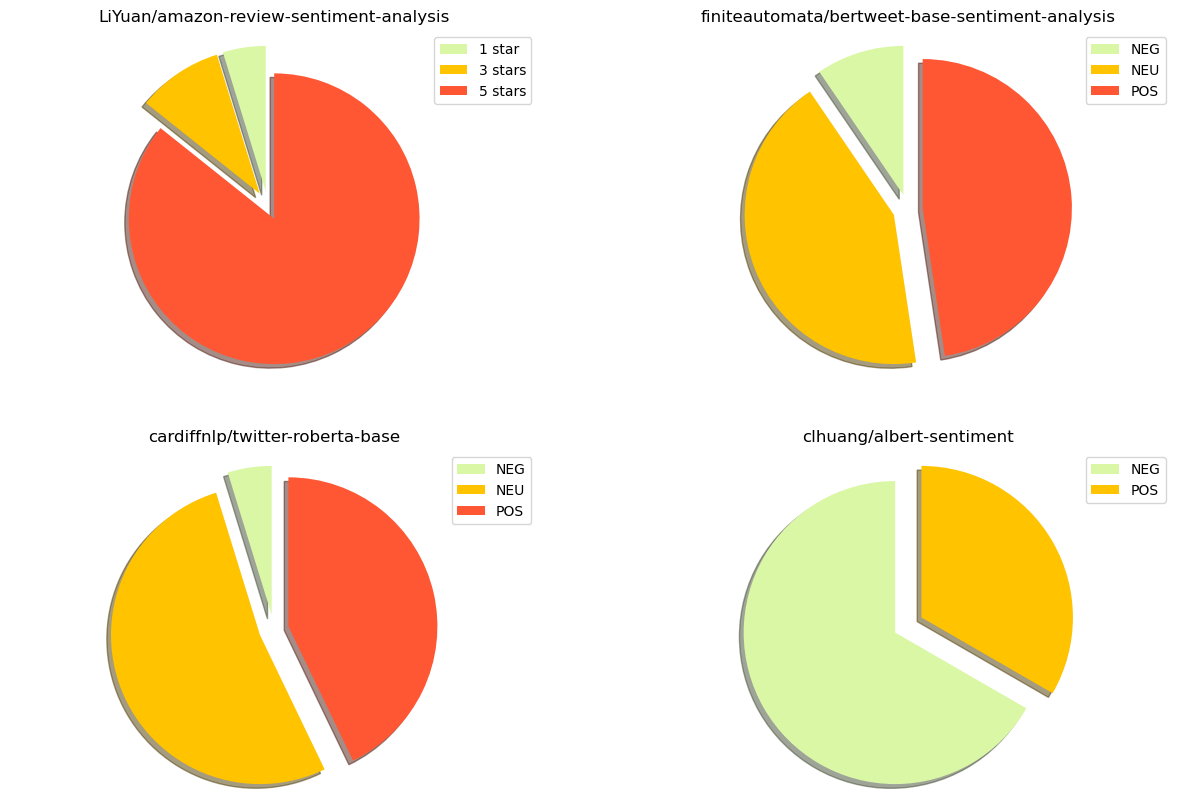

-----------------------------------------------------------------------------------
LiYuan : 5 stars
cardiffnlp : LABEL_1
finiteautomata : POS
clhuang : LABEL_0
Majority emotions of the comments : Positive ! You may have a look on the few comments.
-----------------------------------------------------------------------------------
Recommendation for improvements : 
1) buy it not bad for the price at worth it !! 

2) arrived on time well packed disappointed with quality does the job it was only for keeping dust off second laptop,a very tight fit though 

3) Very nice product for the money. Only use it once a week, should last long time, would buy again. 



In [13]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(15, 10))
gs = GridSpec(nrows=2, ncols=2)

colors = ['#DAF7A6', '#FFC300', '#FF5733', '#C70039', '#900C3F']

LiYuan_l = [f'{item}' for item in total_scores['LiYuan'].keys() if total_scores['LiYuan'][item] != 0] 
LiYuan_v = [item for item in total_scores['LiYuan'].values() if item != 0 ] 


card_l = [f'{item}' for item in total_scores['cardiffnlp'].keys() if total_scores['cardiffnlp'][item] != 0]
if 'LABEL_0' in card_l:
    card_l = list(map(lambda x: x.replace('LABEL_0', 'NEG'), card_l))
if 'LABEL_1' in card_l:
    card_l = list(map(lambda x: x.replace('LABEL_1', 'NEU'), card_l))
if 'LABEL_2' in card_l:
    card_l = list(map(lambda x: x.replace('LABEL_2', 'POS'), card_l)) 
card_v = [item for item in total_scores['cardiffnlp'].values() if item != 0 ] 

finit_l = [f'{item}' for item in total_scores['finiteautomata'].keys() if total_scores['finiteautomata'][item] != 0] 
finit_v = [item for item in total_scores['finiteautomata'].values() if item != 0 ] 

huang_l = [f'{item}' for item in total_scores['clhuang'].keys() if total_scores['clhuang'][item] != 0]
if 'LABEL_0' in huang_l:
    huang_l = list(map(lambda x: x.replace('LABEL_0', 'NEG'), huang_l)) 
if 'LABEL_1' in huang_l:
    huang_l = list(map(lambda x: x.replace('LABEL_1', 'POS'), huang_l))
huang_v = [item for item in total_scores['clhuang'].values() if item != 0 ] 


ax0 = fig.add_subplot(gs[0, 0])
patch_L, texts= ax0.pie(LiYuan_v, colors = colors, startangle=90, shadow=True,explode=((0.1, )*len(LiYuan_v)))
ax0.legend(patch_L, LiYuan_l, loc="best")
ax0.axis('equal')
ax0.set_title("LiYuan/amazon-review-sentiment-analysis")

ax1 = fig.add_subplot(gs[1, 0])
patch_c, texts= ax1.pie(card_v, colors = colors, startangle=90, shadow=True,explode=((0.1, )*len(card_v)))
ax1.legend(patch_c, card_l, loc="best")
ax1.axis('equal')
ax1.set_title("cardiffnlp/twitter-roberta-base")

ax2 = fig.add_subplot(gs[0, 1])
patch_f, texts= ax2.pie(finit_v, colors = colors, startangle=90, shadow=True,explode=((0.1, )*len(finit_v)))
ax2.legend(patch_f, finit_l, loc="best")
ax2.axis('equal')
ax2.set_title("finiteautomata/bertweet-base-sentiment-analysis")

ax3 = fig.add_subplot(gs[1, 1])
patch_h, texts= ax3.pie(huang_v, colors = colors, startangle=90, shadow=True, explode=((0.1, )*len(huang_v)))
ax3.legend(patch_h, huang_l, loc="best")
ax3.axis('equal')
ax3.set_title("clhuang/albert-sentiment")

plt.show()

print("-----------------------------------------------------------------------------------")
comment = []
for model in models:
    ranking = np.argsort(list(total_scores[model].values()))
    ranking = ranking[::-1]
    config = AutoConfig.from_pretrained(globals()[model])
    print(f'{model} : {config.id2label[ranking[0]]}')
    comment.append(config.id2label[ranking[0]])

marks = 0
if (comment[0] == '5 stars') or (comment[0] == '4 stars'):
    marks += 1
elif (comment[0] == '2 stars') or (comment[0] == '1 stars'):
    marks -= 1
if (comment[1] == 'LABEL_2'):
    marks += 1
elif (comment[1] == 'LABEL_0'):
    marks -= 1
if (comment[2] == 'POS'):
    marks += 1
elif (comment[2] == 'NEG'):
    marks -= 1
if (comment[3] == 'LABEL_1'):
    marks += 1
elif (comment[3] == 'LABEL_0'):
    marks -= 1

if marks >= 0:
    result = 'Positive ! You may have a look on the few comments.'
elif marks == 0:
    result = 'Neutral ! There are some areas still could be improved and the comments are listed below.'
else:
    result = 'Negative ! Please study the comments below in order to improve the product quality.'
    
print(f'Majority emotions of the comments : {result}')

print("-----------------------------------------------------------------------------------")

print(f'Recommendation for improvements : ')
for idx, comment in enumerate(ext_comments):
    print(f'{idx+1}) {comment} \n')